In [1]:
# loop through all files ✅
# visualize all point clouds in matplot lib gif ✅
# Create an empty dict to store all calculated features ✅
# calculate the following features for each file

# item id ✅
# original classification ✅

# number of points ✅
# Linearity ✅
# Sphericality ✅
# Verticality ✅
# Planarity ✅
# point normals x ✅
# point normals y ✅
# point normals z ✅
# bounding box ✅
# avg distance to centroid ✅
# Covariance xyz cov(X,Y,Z)=E[(x−E[X])(y−E[Y])(z−E[Z])]=(x−E[X])(y−E[Y])z−E[Z]) ✅
# RMSE ✅
# Spread over x ✅
# Spread over y ✅
# Spread over z ✅

# assign feature to dictionary ✅
# create shift in test and validation data ✅
# visualize 500 data points based on dictionary data when comparing two features ✅ 256 images
# perform RF for all combinations of features and classify 5 types each time ✅
# check overal accuracy and mean per-class accuracy ✅
# make confusion matrix ✅
# visualize the overal accuracy as pixels ✅
# visualize mean per-class accuracy ✅
# pick "best" confusion matrix for in report ✅

# perform SVM for all combinations of features and classify 5 types each time ✅
# check overal accuracy and mean per-class accuracy ✅
# make confusion matrix ✅
# visualize the overal accuracy as pixels
# visualize mean per-class accuracy 
# pick "best" confusion matrix for in report

# visualize the learning curve 

### list of imports

In [2]:

import glob
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import KDTree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.cm as cm
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import gaussian_kde
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from matplotlib.colors import LightSource

folder_path = "data/pointclouds/*.xyz"

txt_files = glob.glob(folder_path)

### All functions

In [3]:
def hello_world():
    print("Hello world!")
    
def original_classifier(i):
    if (i <= 99):
        return "building"
    elif (100 <= i <= 199):
        return "car"
    elif (200 <= i <= 299):
        return "fence"
    elif (300 <= i <= 399):
        return "pole"
    elif (400 <= i <= 499):
        return "tree"
    
def compute_centroid(point_cloud_number,number_of_points,data_set):
    total_x = 0
    total_y = 0
    total_z = 0   
    for i in range(number_of_points):
        x = data_set[i][0]
        y = data_set[i][1]
        z = data_set[i][2]
        total_x += x
        total_y += y
        total_z += z
    avg_x = total_x/number_of_points
    avg_y = total_y/number_of_points
    avg_z = total_z/number_of_points
    return avg_x,avg_y,avg_z

def color_definer(i):
    if (0 <= i <= 99):
        color = "firebrick"
        return color
    elif (100 <= i <= 199):
        color = "navy"
        return color
    elif (200 <= i <= 299):
        color = "grey"
        return color
    elif (300 <= i <= 399):
        color = "plum"
        return color
    elif (400 <= i <= 499):
        color = "seagreen"
        return color

def distance_to_center(center_x,center_y,center_z,data_set,number_of_points):
    total_distance = 0
    for i in range(number_of_points):
        x = data_set[i][0]
        y = data_set[i][1]
        z = data_set[i][2]
        pythagoras_distance = ((center_x-x)**2 + ((center_y-y)**2 + (center_z-z)**2))**0.5
        total_distance += pythagoras_distance
    return total_distance

def avg_distance_to_center(total_distance,number_of_points):
    avg_distance_to_center = total_distance / number_of_points
    return avg_distance_to_center

def rms_distance(total_distance,number_of_points):
    rms = ((total_distance**2) / number_of_points)**0.5
    return rms

def compute_bounding_box(number_of_points,data_set):
    x_coordinates = []
    y_coordinates = []
    z_coordinates = []
    for i in range(number_of_points):
        x = data_set[i][0]
        y = data_set[i][1]
        z = data_set[i][2]
        x_coordinates.append(x)
        y_coordinates.append(y)
        z_coordinates.append(z)
        
    lower_left_x = min(x_coordinates)
    lower_left_y = min(y_coordinates)
    lower_left_z = min(z_coordinates)
    
    upper_right_x = max(x_coordinates)
    upper_right_y = max(y_coordinates)
    upper_right_z = max(z_coordinates)
    
    return lower_left_x,lower_left_y,lower_left_z,upper_right_x,upper_right_y,upper_right_z

def box_size(lower_left_x,lower_left_y,lower_left_z,upper_right_x,upper_right_y,upper_right_z):
    x_length = abs(lower_left_x - upper_right_x)
    y_length = abs(lower_left_y - upper_right_y)
    z_length = abs(lower_left_z - upper_right_z)
    volume = x_length * y_length * z_length
    return volume

def point_normals():
    "test"
    
def spread_over_x(number_of_points,data_set):
    x_coordinates = []
    for i in range(number_of_points):
        x = data_set[i][0]
        x_coordinates.append(x)
    minimum_x = min(x_coordinates)
    maximum_x = max(x_coordinates)
    x_spread = abs(minimum_x - maximum_x)
    return x_spread

def spread_over_y(number_of_points,data_set):
    y_coordinates = []
    for i in range(number_of_points):
        y = data_set[i][1]
        y_coordinates.append(y)
    minimum_y = min(y_coordinates)
    maximum_y = max(y_coordinates)
    y_spread = abs(minimum_y - maximum_y)
    return y_spread

def spread_over_z(number_of_points,data_set):
    z_coordinates = []
    for i in range(number_of_points):
        z = data_set[i][2]
        z_coordinates.append(z)
    minimum_z = min(z_coordinates)
    maximum_z = max(z_coordinates)
    z_spread = abs(minimum_z - maximum_z)
    return z_spread

def verticality(neighbourhood_size, data_set):
    neighbourhood_indices = np.random.choice(data_set.shape[0], size=neighbourhood_size, replace=False)
    neighbourhood_points = data_set[neighbourhood_indices]
    centroid = np.mean(neighbourhood_points, axis = 0)
    covariance = np.cov((neighbourhood_points - centroid).T)
    _,_,normals = np.linalg.svd(covariance)
    normal = normals[2]
    # Compute the angle between the normal vector and the vertical axis
    vertical_axis = np.array([0, 0, 1])
    angle = np.arccos(np.dot(normal, vertical_axis))
    verticality = np.mean(angle)
    return verticality

def covariance_over_xyz(data_set,number_of_points):
    # Covariance xyz cov(X,Y,Z)=E[(x−E[X])(y−E[Y])(z−E[Z])]
    # Calculates E[X] // E[Y] // E[Z]
    total_x = 0
    total_y = 0
    total_z = 0
    for i in range(number_of_points):
        x = data_set[i][0]
        y = data_set[i][1]
        z = data_set[i][2]
        total_x += x
        total_y += y
        total_z += z
    expected_x = total_x/number_of_points
    expected_y = total_y/number_of_points
    expected_z = total_z/number_of_points
    # calculate (x-E[X]) // (y-E[Y]) // (z-E[Z])
    expected = 0
    for i in range(number_of_points):
        x = data_set[i][0]
        y = data_set[i][1]
        z = data_set[i][2]
        x_min_expected_x = x - expected_x
        y_min_expected_y = y - expected_y
        z_min_expected_z = z - expected_z
        total = x_min_expected_x * y_min_expected_y * z_min_expected_z
        expected += total
    cov = expected / number_of_points
    return cov

def color_definer_2(predicted_class):
    if (predicted_class == 'building'):
        color1 = 'firebrick'
        return color1
    elif (predicted_class == 'car'):
        color1 = 'navy'
        return color1
    elif (predicted_class == 'fence'):
        color1 = 'grey'
        return color1
    elif (predicted_class == 'pole'):
        color1 = 'plum'
        return color1
    elif (predicted_class == 'tree'):
        color1 = 'seagreen'
        return color1
    else:
        color1 = 'r'
        return color1 
    
def confusion_matrix(predicted_class,accuracy_test):
    building_is_building    = 0
    building_is_car         = 0
    building_is_fence       = 0
    building_is_pole        = 0
    building_is_tree        = 0
    car_is_building         = 0
    car_is_car              = 0
    car_is_fence            = 0
    car_is_pole             = 0
    car_is_tree             = 0
    fence_is_building       = 0
    fence_is_car            = 0
    fence_is_fence          = 0
    fence_is_pole           = 0
    fence_is_tree           = 0
    pole_is_building        = 0
    pole_is_car             = 0
    pole_is_fence           = 0
    pole_is_pole            = 0
    pole_is_tree            = 0
    tree_is_building        = 0
    tree_is_car             = 0
    tree_is_fence           = 0
    tree_is_pole            = 0
    tree_is_tree            = 0
    
    for i in range(len(predicted_class)):
  
        if (predicted_class[i] == 'building' and accuracy_test[i] == 'building'):
            building_is_building += 1
        if (predicted_class[i] == 'building' and accuracy_test[i] == 'car'):
            building_is_car += 1
        if (predicted_class[i] == 'building' and accuracy_test[i] == 'fence'):
            building_is_fence += 1
        if (predicted_class[i] == 'building' and accuracy_test[i] == 'pole'):
            building_is_pole += 1
        if (predicted_class[i] == 'building' and accuracy_test[i] == 'tree'):
            building_is_tree += 1

        if (predicted_class[i] == 'car' and accuracy_test[i] == 'building'):
            car_is_building += 1
        if (predicted_class[i] == 'car' and accuracy_test[i] == 'car'):
            car_is_car += 1
        if (predicted_class[i] == 'car' and accuracy_test[i] == 'fence'):
            car_is_fence += 1
        if (predicted_class[i] == 'car' and accuracy_test[i] == 'pole'):
            car_is_pole += 1
        if (predicted_class[i] == 'car' and accuracy_test[i] == 'tree'):
            car_is_tree += 1   

        if (predicted_class[i] == 'fence' and accuracy_test[i] == 'building'):
            fence_is_building += 1
        if (predicted_class[i] == 'fence' and accuracy_test[i] == 'car'):
            fence_is_car += 1
        if (predicted_class[i] == 'fence' and accuracy_test[i] == 'fence'):
            fence_is_fence += 1
        if (predicted_class[i] == 'fence' and accuracy_test[i] == 'pole'):
            fence_is_pole += 1
        if (predicted_class[i] == 'fence' and accuracy_test[i] == 'tree'):
                fence_is_tree += 1

        if (predicted_class[i] == 'pole' and accuracy_test[i] == 'building'):
            pole_is_building += 1
        if (predicted_class[i] == 'pole' and accuracy_test[i] == 'car'):
            pole_is_car += 1
        if (predicted_class[i] == 'pole' and accuracy_test[i] == 'fence'):
            pole_is_fence += 1
        if (predicted_class[i] == 'pole' and accuracy_test[i] == 'pole'):
            pole_is_pole += 1
        if (predicted_class[i] == 'pole' and accuracy_test[i] == 'tree'):
            pole_is_tree += 1   

        if (predicted_class[i] == 'tree' and accuracy_test[i] == 'building'):
            tree_is_building += 1
        if (predicted_class[i] == 'tree' and accuracy_test[i] == 'car'):
            tree_is_car += 1
        if (predicted_class[i] == 'tree' and accuracy_test[i] == 'fence'):
            tree_is_fence += 1
        if (predicted_class[i] == 'tree' and accuracy_test[i] == 'pole'):
            tree_is_pole += 1
        if (predicted_class[i] == 'tree' and accuracy_test[i] == 'tree'):
            tree_is_tree += 1   

    a = '{:03d}'.format(building_is_building)
    b = '{:03d}'.format(building_is_car)   
    c = '{:03d}'.format(building_is_fence)       
    d = '{:03d}'.format(building_is_pole)        
    e = '{:03d}'.format(building_is_tree)        
    f = '{:03d}'.format(car_is_building)         
    g = '{:03d}'.format(car_is_car)              
    h = '{:03d}'.format(car_is_fence)            
    i = '{:03d}'.format(car_is_pole)             
    j = '{:03d}'.format(car_is_tree)             
    k = '{:03d}'.format(fence_is_building)       
    l = '{:03d}'.format(fence_is_car)            
    m = '{:03d}'.format(fence_is_fence)          
    n = '{:03d}'.format(fence_is_pole)           
    o = '{:03d}'.format(fence_is_tree)           
    p = '{:03d}'.format(pole_is_building)        
    q = '{:03d}'.format(pole_is_car)             
    r = '{:03d}'.format(pole_is_fence)           
    s = '{:03d}'.format(pole_is_pole)            
    t = '{:03d}'.format(pole_is_tree)            
    u = '{:03d}'.format(tree_is_building) 
    v = '{:03d}'.format(tree_is_car)             
    w = '{:03d}'.format(tree_is_fence)           
    x = '{:03d}'.format(tree_is_pole)            
    y = '{:03d}'.format(tree_is_tree)            

    building_total_down = '{:03d}'.format(building_is_building + car_is_building + fence_is_building + pole_is_building + tree_is_building)
    car_total_down = '{:03d}'.format(building_is_car + car_is_car + fence_is_car + pole_is_car + tree_is_car) 
    fence_total_down = '{:03d}'.format(building_is_fence + car_is_fence + fence_is_fence + pole_is_fence + tree_is_fence) 
    pole_total_down = '{:03d}'.format(building_is_pole + car_is_pole + fence_is_pole + pole_is_pole + tree_is_pole) 
    tree_total_down = '{:03d}'.format(building_is_tree + car_is_tree + fence_is_tree + pole_is_tree + tree_is_tree) 

    building_total_right = '{:03d}'.format(int(a) + int(b) + int(c) + int(d) + int(e))
    car_total_right = '{:03d}'.format(int(f) + int(g) + int(h) + int(i) + int(j))
    fence_total_right = '{:03d}'.format(int(k) + int(l) + int(m) + int(n) + int(o))
    pole_total_right = '{:03d}'.format(int(p) + int(q) + int(r) + int(s) + int(t))
    tree_total_right = '{:03d}'.format(int(u) + int(v) + int(w) + int(x) + int(y))



    super_total = '{:03d}'.format(int(a) + int(b) + int(c) + int(d) + int(e) + int(f) + int(g) + int(h) + int(i) + int(j) + int(k) + int(l) + int(m) + int(n) + int(o) + int(p) + int(q) + int(r) + int(s) + int(t) + int(u) + int(v) + int(w) + int(x) + int(y))  
    
    print(f"|----------|----------|-----|-------|------|------|-------|")
    print(f"|          | building | car | fence | pole | tree | total |")
    print(f"|----------|----------|-----|-------|------|------|-------|")
    print(f"| building |    {a}   | {b} |  {c}  | {d}  | {e}  |  {building_total_right}  |")
    print(f"|----------|----------|-----|-------|------|------|-------|")
    print(f"| car      |    {f}   | {g} |  {h}  | {i}  | {j}  |  {car_total_right}  |")
    print(f"|----------|----------|-----|-------|------|------|-------|")
    print(f"| fence    |    {k}   | {l} |  {m}  | {n}  | {o}  |  {fence_total_right}  |")
    print(f"|----------|----------|-----|-------|------|------|-------|")
    print(f"| pole     |    {p}   | {q} |  {r}  | {s}  | {t}  |  {pole_total_right}  |")
    print(f"|----------|----------|-----|-------|------|------|-------|")
    print(f"| tree     |    {u}   | {v} |  {w}  | {x}  | {y}  |  {tree_total_right}  |")
    print(f"|----------|----------|-----|-------|------|------|-------|")
    print(f"| total    |    {building_total_down}   | {car_total_down} |  {fence_total_down}  | {pole_total_down}  | {tree_total_down}  |  {super_total}  |")
    print(f"|----------|----------|-----|-------|------|------|-------|")
    
def mosaic_maker(test_sizes,outcome,types,values,threshold):
    for i in test_sizes:
        train_data, test_data = train_test_split(outcome, test_size=i)

        # create a DataFrame from the 'train_data' dataset
        df = pd.DataFrame(train_data)

        # calculate the average accuracy for each combination of 'first_feature' and 'second_feature'
        table = df.pivot_table(index='first_feature', columns='second_feature', values=values, aggfunc='mean')

        # Define the original colormap
        cmap = plt.get_cmap('Blues')

        # Get the colors from the original colormap 
        colors = cmap(np.linspace(0, 1, 256))

        # Create a new colormap with the same number of colors as the original
        new_colors = colors.copy()

        # Replace colors above the threshold with a new color
        new_colors[int(threshold*255):] = [1, 0, 0, 1]  # Red color

        # Create a new colormap using the modified colors
        new_cmap = ListedColormap(new_colors)

        # Define a list of 20 hexcode colors
        colors_hex = ['#66538A','#5C5B92','#51649B','#476CA3','#3D75AC',
                      '#327DB4','#3288B9','#4898B5','#5FA7B1','#75B7AD',
                      '#8CC7A9','#A2D7A6','#B8E19C','#CEE78F','#E4EE82',
                      '#FBF476','#FED76B','#FDB262','#EB6740','#D7191C']

        # Convert hex colors to RGB values
        colors_rgb = [mcolors.hex2color(color_hex) for color_hex in colors_hex]

        # Set the colormap to be the RGB values
        cmap = mcolors.ListedColormap(colors_rgb)
        
        # create the mosaic plot
        plt.figure(figsize=(6, 6))
        plt.title(f'{values} for {int(i*500)} classifications')
        plt.pcolor(table, cmap=cmap)

        plt.clim(0, 1)

        # add labels to the x-axis and y-axis
        plt.xticks(range(len(table.columns)), table.columns, rotation=315, ha='left')
        plt.yticks(range(len(table.index)), table.index, va='baseline')

        # add colorbar
        plt.colorbar()
        plt.savefig(f"mosaic_{types}/mosaic_{i}.png",dpi=300, bbox_inches='tight')
        plt.close()
        
def point_density(data_set,number_of_points):
    # assume 'numpy_array' is a 3D NumPy array
    number_of_points = data_set.shape[0]

    # initialize empty arrays to store x, y, z values
    x_list = []
    y_list = []
    z_list = []

    # extract x, y, z values from 'numpy_array' and append to respective lists
    for j in range(number_of_points):
        x = data_set[j][0]
        y = data_set[j][1]
        z = data_set[j][2]
        x_list.append(x)
        y_list.append(y)
        z_list.append(z)

    # convert lists to NumPy arrays
    x_array = np.array(x_list)
    y_array = np.array(y_list)
    z_array = np.array(z_list)

    # estimate the density function
    xyz = np.vstack([x_array, y_array, z_array])
    kde = gaussian_kde(xyz)

    # evaluate the density function on a grid of points
    xmin, ymin, zmin = xyz.min(axis=1)
    xmax, ymax, zmax = xyz.max(axis=1)
    xgrid, ygrid, zgrid = np.mgrid[xmin:xmax:100j, ymin:ymax:100j, zmin:zmax:100j]
    positions = np.vstack([xgrid.ravel(), ygrid.ravel(), zgrid.ravel()])
    density = kde(positions).reshape(xgrid.shape)

    # calculate the average point density over the entire space
    avg_density = np.mean(density)
    
    return density

def compute_planarity(xyz_array):
    # calculate the PCA of the array
    pca = PCA(n_components=3)
    pca.fit(xyz_array)

    # extract the eigenvectors and eigenvalues
    eigenvalues = pca.explained_variance_
    eigenvectors = pca.components_

    # calculate planarity
    planarity = (eigenvalues[1] - eigenvalues[2]) / eigenvalues[0]

    return planarity

def RF_loop_2(test_features,test_sizes,data_df,outcome_RF):
    for i in test_sizes:
        for j in test_features:
            for k in test_features:
                data_dictionary = {}
                data_dictionary['test_size'] = i
                # split your data into training and testing sets
                X = data_df[[j, k]] # select the two features to use
                y = data_df['original classification']
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)

                clf = RandomForestClassifier(n_estimators=5)

                # train the classifier using the training data
                clf.fit(X_train, y_train)

                # evaluate the classifier's performance on the testing data
                predicted_class = clf.predict(X_test)

                accuracy_test = y_test.tolist()

                # overal accuracy

                n = 0
                for l in range(len(predicted_class)):
                    if (predicted_class[l] == accuracy_test[l]):
                        n += 1

                data_dictionary['first_feature'] = j
                data_dictionary['second_feature'] = k
                data_dictionary['number_of_correct_classifications'] = n

                overal_accuracy = n / len(predicted_class)

                data_dictionary['size_of_test_data'] = len(predicted_class)
                data_dictionary['overal_accuracy'] = overal_accuracy
                # Mean per-class accuracy

                objects_per_class = 100
                n_building = 0
                n_car = 0
                n_fence = 0
                n_pole = 0
                n_tree = 0

                for l in range(len(predicted_class)):
                    if (accuracy_test[l] == 'building'):
                        n_building += 1
                    if (accuracy_test[l] == 'car'):
                        n_car += 1
                    if (accuracy_test[l] == 'fence'):
                        n_fence += 1
                    if (accuracy_test[l] == 'pole'):
                        n_pole += 1
                    if (accuracy_test[l] == 'tree'):
                        n_tree += 1

                predicted_n_building = 0
                predicted_n_car = 0
                predicted_n_fence = 0
                predicted_n_pole = 0
                predicted_n_tree = 0

                for l in range(len(predicted_class)):
                    if (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'building'):
                        predicted_n_building += 1
                    elif (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'car'):
                        predicted_n_car += 1
                    elif (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'fence'):
                        predicted_n_fence += 1
                    elif (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'pole'):
                        predicted_n_pole += 1
                    elif (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'tree'):
                        predicted_n_tree += 1


                if (n_building != 0):
                    accuracy_building = predicted_n_building / n_building
                else:
                    accuracy_building = np.nan

                if (n_car != 0):
                    accuracy_car = predicted_n_car / n_car
                else:
                    accuracy_car = np.nan

                if (n_fence != 0):
                    accuracy_fence = predicted_n_fence / n_fence
                else:
                    accuracy_fence = np.nan

                if (n_pole != 0):
                    accuracy_pole = predicted_n_pole / n_pole
                else:
                    accuracy_pole = np.nan

                if (n_tree != 0):
                    accuracy_tree = predicted_n_tree / n_tree
                else:
                    accuracy_tree = np.nan

                data_dictionary['accuracy_building'] = accuracy_building
                data_dictionary['accuracy_car'] = accuracy_car
                data_dictionary['accuracy_fence'] = accuracy_fence
                data_dictionary['accuracy_pole'] = accuracy_pole
                data_dictionary['accuracy_tree'] = accuracy_tree
                data_dictionary['predicted_class'] = predicted_class
                data_dictionary['accuracy_test'] = accuracy_test

                outcome_RF.append(data_dictionary)
    return outcome_RF
                
def RF_loop_3(test_features,test_sizes,data_df,outcome_RF):
    for i in test_sizes:
        for j in test_features:
            for k in test_features:
                for g in test_features:
                    data_dictionary = {}
                    data_dictionary['test_size'] = i
                    # split your data into training and testing sets
                    X = data_df[[j, k,g]] # select the two features to use
                    y = data_df['original classification']
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)

                    clf = RandomForestClassifier(n_estimators=5)

                    # train the classifier using the training data
                    clf.fit(X_train, y_train)

                    # evaluate the classifier's performance on the testing data
                    predicted_class = clf.predict(X_test)

                    accuracy_test = y_test.tolist()

                    # overal accuracy

                    n = 0
                    for l in range(len(predicted_class)):
                        if (predicted_class[l] == accuracy_test[l]):
                            n += 1

                    data_dictionary['first_feature'] = j
                    data_dictionary['second_feature'] = k
                    data_dictionary['third_feature'] = g
                    data_dictionary['number_of_correct_classifications'] = n

                    overal_accuracy = n / len(predicted_class)

                    data_dictionary['size_of_test_data'] = len(predicted_class)
                    data_dictionary['overal_accuracy'] = overal_accuracy
                    # Mean per-class accuracy

                    objects_per_class = 100
                    n_building = 0
                    n_car = 0
                    n_fence = 0
                    n_pole = 0
                    n_tree = 0

                    for l in range(len(predicted_class)):
                        if (accuracy_test[l] == 'building'):
                            n_building += 1
                        if (accuracy_test[l] == 'car'):
                            n_car += 1
                        if (accuracy_test[l] == 'fence'):
                            n_fence += 1
                        if (accuracy_test[l] == 'pole'):
                            n_pole += 1
                        if (accuracy_test[l] == 'tree'):
                            n_tree += 1

                    predicted_n_building = 0
                    predicted_n_car = 0
                    predicted_n_fence = 0
                    predicted_n_pole = 0
                    predicted_n_tree = 0

                    for l in range(len(predicted_class)):
                        if (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'building'):
                            predicted_n_building += 1
                        elif (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'car'):
                            predicted_n_car += 1
                        elif (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'fence'):
                            predicted_n_fence += 1
                        elif (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'pole'):
                            predicted_n_pole += 1
                        elif (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'tree'):
                            predicted_n_tree += 1


                    if (n_building != 0):
                        accuracy_building = predicted_n_building / n_building
                    else:
                        accuracy_building = np.nan

                    if (n_car != 0):
                        accuracy_car = predicted_n_car / n_car
                    else:
                        accuracy_car = np.nan

                    if (n_fence != 0):
                        accuracy_fence = predicted_n_fence / n_fence
                    else:
                        accuracy_fence = np.nan

                    if (n_pole != 0):
                        accuracy_pole = predicted_n_pole / n_pole
                    else:
                        accuracy_pole = np.nan

                    if (n_tree != 0):
                        accuracy_tree = predicted_n_tree / n_tree
                    else:
                        accuracy_tree = np.nan

                    data_dictionary['accuracy_building'] = accuracy_building
                    data_dictionary['accuracy_car'] = accuracy_car
                    data_dictionary['accuracy_fence'] = accuracy_fence
                    data_dictionary['accuracy_pole'] = accuracy_pole
                    data_dictionary['accuracy_tree'] = accuracy_tree
                    data_dictionary['predicted_class'] = predicted_class
                    data_dictionary['accuracy_test'] = accuracy_test
                    outcome_RF.append(data_dictionary)
                
def RF_loop_with_images(test_features,test_sizes,data_df,outcome_RF):
    for i in test_sizes:
        for j in test_features:
            for k in test_features:
                data_dictionary = {}
                data_dictionary['test_size'] = i
                # split your data into training and testing sets
                X = data_df[[j, k]] # select the two features to use
                y = data_df['original classification']
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)

                clf = RandomForestClassifier(n_estimators=5)

                # train the classifier using the training data
                clf.fit(X_train, y_train)

                # evaluate the classifier's performance on the testing data
                predicted_class = clf.predict(X_test)

                accuracy_test = y_test.tolist()

                # overal accuracy

                n = 0
                for l in range(len(predicted_class)):
                    if (predicted_class[l] == accuracy_test[l]):
                        n += 1

                data_dictionary['first_feature'] = j
                data_dictionary['second_feature'] = k
                data_dictionary['number_of_correct_classifications'] = n

                overal_accuracy = n / len(predicted_class)

                data_dictionary['size_of_test_data'] = len(predicted_class)
                data_dictionary['overal_accuracy'] = overal_accuracy
                # Mean per-class accuracy

                objects_per_class = 100
                n_building = 0
                n_car = 0
                n_fence = 0
                n_pole = 0
                n_tree = 0

                for l in range(len(predicted_class)):
                    if (accuracy_test[l] == 'building'):
                        n_building += 1
                    if (accuracy_test[l] == 'car'):
                        n_car += 1
                    if (accuracy_test[l] == 'fence'):
                        n_fence += 1
                    if (accuracy_test[l] == 'pole'):
                        n_pole += 1
                    if (accuracy_test[l] == 'tree'):
                        n_tree += 1

                predicted_n_building = 0
                predicted_n_car = 0
                predicted_n_fence = 0
                predicted_n_pole = 0
                predicted_n_tree = 0

                for l in range(len(predicted_class)):
                    if (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'building'):
                        predicted_n_building += 1
                    elif (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'car'):
                        predicted_n_car += 1
                    elif (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'fence'):
                        predicted_n_fence += 1
                    elif (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'pole'):
                        predicted_n_pole += 1
                    elif (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'tree'):
                        predicted_n_tree += 1


                if (n_building != 0):
                    accuracy_building = predicted_n_building / n_building
                else:
                    accuracy_building = np.nan

                if (n_car != 0):
                    accuracy_car = predicted_n_car / n_car
                else:
                    accuracy_car = np.nan

                if (n_fence != 0):
                    accuracy_fence = predicted_n_fence / n_fence
                else:
                    accuracy_fence = np.nan

                if (n_pole != 0):
                    accuracy_pole = predicted_n_pole / n_pole
                else:
                    accuracy_pole = np.nan

                if (n_tree != 0):
                    accuracy_tree = predicted_n_tree / n_tree
                else:
                    accuracy_tree = np.nan

                data_dictionary['accuracy_building'] = accuracy_building
                data_dictionary['accuracy_car'] = accuracy_car
                data_dictionary['accuracy_fence'] = accuracy_fence
                data_dictionary['accuracy_pole'] = accuracy_pole
                data_dictionary['accuracy_tree'] = accuracy_tree

                feature_list = X_test.values.tolist()

                classes = y_test.tolist()
                # print(classes)
                for l in range(len(X_test)):

                    x = feature_list[l][0]
                    y = feature_list[l][1]
                    plt.xlabel(j)
                    plt.ylabel(k)
                    plt.scatter(x,y,c=color_definer_2(classes[l]),s=5)
                plt.savefig(f"256features/RF output_{i}_{j}_{k}.png")
                # plt.show()
                confusion_matrix(predicted_class,accuracy_test)
                # print(data_dictionary)
                outcome_RF.append(data_dictionary)
                
def individual_RF(data_df,feature_1,feature_2,test_size):
        data_dictionary = {}
        data_dictionary['test_size'] = test_size
        # split your data into training and testing sets
        X = data_df[[feature_1, feature_2]] # select the two features to use
        y = data_df['original classification']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        clf = RandomForestClassifier(n_estimators=5)
        # train the classifier using the training data
        clf.fit(X_train, y_train)
        # evaluate the classifier's performance on the testing data
        predicted_class = clf.predict(X_test)
        accuracy_test = y_test.tolist()
        # overal accuracy
        n = 0
        for l in range(len(predicted_class)):
            if (predicted_class[l] == accuracy_test[l]):
                n += 1
        data_dictionary['first_feature'] = feature_1
        data_dictionary['second_feature'] = feature_2
        data_dictionary['number_of_correct_classifications'] = n
        overal_accuracy = n / len(predicted_class)
        data_dictionary['size_of_test_data'] = len(predicted_class)
        print('overal_accuracy:',overal_accuracy)
        # Mean per-class accuracy
        objects_per_class = 100
        n_building = 0
        n_car = 0
        n_fence = 0
        n_pole = 0
        n_tree = 0
        for l in range(len(predicted_class)):
            if (accuracy_test[l] == 'building'):
                n_building += 1
            if (accuracy_test[l] == 'car'):
                n_car += 1
            if (accuracy_test[l] == 'fence'):
                n_fence += 1
            if (accuracy_test[l] == 'pole'):
                n_pole += 1
            if (accuracy_test[l] == 'tree'):
                n_tree += 1
        predicted_n_building = 0
        predicted_n_car = 0
        predicted_n_fence = 0
        predicted_n_pole = 0
        predicted_n_tree = 0
        for l in range(len(predicted_class)):
            if (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'building'):
                predicted_n_building += 1
            elif (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'car'):
                predicted_n_car += 1
            elif (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'fence'):
                predicted_n_fence += 1
            elif (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'pole'):
                predicted_n_pole += 1
            elif (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'tree'):
                predicted_n_tree += 1
        if (n_building != 0):
            accuracy_building = predicted_n_building / n_building
        else:
            accuracy_building = np.nan
        if (n_car != 0):
            accuracy_car = predicted_n_car / n_car
        else:
            accuracy_car = np.nan
        if (n_fence != 0):
            accuracy_fence = predicted_n_fence / n_fence
        else:
            accuracy_fence = np.nan
        if (n_pole != 0):
            accuracy_pole = predicted_n_pole / n_pole
        else:
            accuracy_pole = np.nan
        if (n_tree != 0):
            accuracy_tree = predicted_n_tree / n_tree
        else:
            accuracy_tree = np.nan
        print('accuracy_building:',accuracy_building)
        print('accuracy_car:',accuracy_car)
        print('accuracy_fence:',accuracy_fence)
        print('accuracy_pole:',accuracy_pole)
        print('accuracy_tree:',accuracy_tree)
        feature_list = X_test.values.tolist()
        classes = y_test.tolist()
        # print(classes)
        for l in range(len(X_test)):
            x = feature_list[l][0]
            y = feature_list[l][1]
            plt.xlabel(feature_1)
            plt.ylabel(feature_2)
            plt.scatter(x,y,c=color_definer_2(classes[l]),s=5)
        # plt.savefig(f"256features/RF output_{i}_{j}_{k}.png")
        plt.show()
        confusion_matrix(predicted_class,accuracy_test)
        print(data_dictionary)
        
def individual_RF_3(data_df,feature_1,feature_2,feature_3,test_size):
        data_dictionary = {}
        data_dictionary['test_size'] = test_size
        # split your data into training and testing sets
        X = data_df[[feature_1, feature_2,feature_3]] # select the two features to use
        y = data_df['original classification']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        clf = RandomForestClassifier(n_estimators=5)
        # train the classifier using the training data
        clf.fit(X_train, y_train)
        # evaluate the classifier's performance on the testing data
        predicted_class = clf.predict(X_test)
        accuracy_test = y_test.tolist()
        # overal accuracy
        n = 0
        for l in range(len(predicted_class)):
            if (predicted_class[l] == accuracy_test[l]):
                n += 1
        data_dictionary['first_feature'] = feature_1
        data_dictionary['second_feature'] = feature_2
        data_dictionary['third_feature'] = feature_3
        data_dictionary['number_of_correct_classifications'] = n
        overal_accuracy = n / len(predicted_class)
        data_dictionary['size_of_test_data'] = len(predicted_class)
        print('overal_accuracy:',overal_accuracy)
        # Mean per-class accuracy
        objects_per_class = 100
        n_building = 0
        n_car = 0
        n_fence = 0
        n_pole = 0
        n_tree = 0
        for l in range(len(predicted_class)):
            if (accuracy_test[l] == 'building'):
                n_building += 1
            if (accuracy_test[l] == 'car'):
                n_car += 1
            if (accuracy_test[l] == 'fence'):
                n_fence += 1
            if (accuracy_test[l] == 'pole'):
                n_pole += 1
            if (accuracy_test[l] == 'tree'):
                n_tree += 1
        predicted_n_building = 0
        predicted_n_car = 0
        predicted_n_fence = 0
        predicted_n_pole = 0
        predicted_n_tree = 0
        for l in range(len(predicted_class)):
            if (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'building'):
                predicted_n_building += 1
            elif (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'car'):
                predicted_n_car += 1
            elif (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'fence'):
                predicted_n_fence += 1
            elif (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'pole'):
                predicted_n_pole += 1
            elif (predicted_class[l] == accuracy_test[l] and predicted_class[l] == 'tree'):
                predicted_n_tree += 1
        if (n_building != 0):
            accuracy_building = predicted_n_building / n_building
        else:
            accuracy_building = np.nan
        if (n_car != 0):
            accuracy_car = predicted_n_car / n_car
        else:
            accuracy_car = np.nan
        if (n_fence != 0):
            accuracy_fence = predicted_n_fence / n_fence
        else:
            accuracy_fence = np.nan
        if (n_pole != 0):
            accuracy_pole = predicted_n_pole / n_pole
        else:
            accuracy_pole = np.nan
        if (n_tree != 0):
            accuracy_tree = predicted_n_tree / n_tree
        else:
            accuracy_tree = np.nan
        print('accuracy_building:',accuracy_building)
        print('accuracy_car:',accuracy_car)
        print('accuracy_fence:',accuracy_fence)
        print('accuracy_pole:',accuracy_pole)
        print('accuracy_tree:',accuracy_tree)
        feature_list = X_test.values.tolist()
        classes = y_test.tolist()
        
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        
        # print(classes)
        for l in range(len(X_test)):
            x = feature_list[l][0]
            y = feature_list[l][1]
            z = feature_list[l][2]

            ax.scatter(x,y,z,c=color_definer_2(classes[l]),s=5)
        ax.set_xlabel(feature_1)
        ax.set_ylabel(feature_2)
        ax.set_zlabel(feature_3)
        # plt.savefig(f"256features/RF output_{i}_{j}_{k}.png")
        plt.show()
        confusion_matrix(predicted_class,accuracy_test)
        print(data_dictionary)
    
def best_in_class_3(outcome_RF_loop_3,a):
    maximum = 0
    for i in range(len(outcome_RF_loop_3)):
        if (outcome_RF_loop_3[i]['test_size'] == a):
            if (outcome_RF_loop_3[i]['overal_accuracy'] > maximum):
                maximum = outcome_RF_loop_3[i]['overal_accuracy']
                feature_1 = outcome_RF_loop_3[i]['first_feature']
                feature_2 = outcome_RF_loop_3[i]['second_feature']
                feature_3 = outcome_RF_loop_3[i]['third_feature']
                test_size = outcome_RF_loop_3[i]['test_size']
                predicted_class = outcome_RF_loop_3[i]['predicted_class']
                accuracy_test = outcome_RF_loop_3[i]['accuracy_test']

    print(maximum)
    print(feature_1)
    print(feature_2)
    print(feature_3)
    print(test_size)
    confusion_matrix(predicted_class,accuracy_test)
    
def best_in_class_2(outcome_RF_loop_2,a):    
    maximum = 0
    for i in range(len(outcome_RF_loop_2)):
        if (outcome_RF_loop_2[i]['test_size'] == a):
            if (outcome_RF_loop_2[i]['overal_accuracy'] > maximum):
                maximum = outcome_RF_loop_2[i]['overal_accuracy']
                feature_1 = outcome_RF_loop_2[i]['first_feature']
                feature_2 = outcome_RF_loop_2[i]['second_feature']
                test_size = outcome_RF_loop_2[i]['test_size']
                predicted_class = outcome_RF_loop_2[i]['predicted_class']
                accuracy_test = outcome_RF_loop_2[i]['accuracy_test']

    print(maximum)
    print(feature_1)
    print(feature_2)
    print(test_size)
    confusion_matrix(predicted_class,accuracy_test)

def worst_in_class_3(outcome_RF_loop_3,a):
    minimum = 1
    for i in range(len(outcome_RF_loop_3)):
        if (outcome_RF_loop_3[i]['test_size'] == a):
            if (outcome_RF_loop_3[i]['overal_accuracy'] < minimum):
                minimum = outcome_RF_loop_3[i]['overal_accuracy']
                feature_1 = outcome_RF_loop_3[i]['first_feature']
                feature_2 = outcome_RF_loop_3[i]['second_feature']
                feature_3 = outcome_RF_loop_3[i]['third_feature']
                test_size = outcome_RF_loop_3[i]['test_size']

    print(minimum)
    print(feature_1)
    print(feature_2)
    print(feature_3)
    print(test_size)
    
def worst_in_class_2(outcome_RF_loop_3,a):
    minimum = 1
    for i in range(len(outcome_RF_loop_3)):
        if (outcome_RF_loop_3[i]['test_size'] == a):
            if (outcome_RF_loop_3[i]['overal_accuracy'] < minimum):
                minimum = outcome_RF_loop_3[i]['overal_accuracy']
                feature_1 = outcome_RF_loop_3[i]['first_feature']
                feature_2 = outcome_RF_loop_3[i]['second_feature']
                test_size = outcome_RF_loop_3[i]['test_size']

    print(minimum)
    print(feature_1)
    print(feature_2)

    print(test_size)
    
def divide_255(a):
    b = a / 255
    return b

def mosaic_maker_3d(outcome_RF_loop_3, test_size, plot_type):
    # make new empty 
    list_of_dictionaries_related_to_test_size = []
    for i in range(len(outcome_RF_loop_3)):
        if (outcome_RF_loop_3[i]['test_size'] == test_size):
            list_of_dictionaries_related_to_test_size.append(outcome_RF_loop_3[i][plot_type])
    test_features = ["sphericality","number_of_points","linearity","average_distance_to_centroid",
                     "bounding_box_size","root_mean_square_error","spread_over_x","spread_over_y",
                     "spread_over_z","verticality","point_normals_x","point_normals_y","point_normals_z",
                     "planarity","covariance_over_xyz"]
    dimensions = (len(test_features),len(test_features),len(test_features))
    voxels = np.zeros(dimensions)
    colors = np.empty(dimensions, dtype='object')
    count_2 = 0
    
    
    # Define the colors for the colormap
    colors_hex = ['#66538A','#5C5B92','#51649B','#476CA3','#3D75AC',
                  '#327DB4','#3288B9','#4898B5','#5FA7B1','#75B7AD',
                  '#8CC7A9','#A2D7A6','#B8E19C','#CEE78F','#E4EE82',
                  '#FBF476','#FED76B','#FDB262','#EB6740','#D7191C']
    colors_rgb = [mcolors.hex2color(color_hex) for color_hex in colors_hex]  # convert hex colors to RGB values
    color = colors_rgb  # set colors to be the RGB values
    # Create a list of evenly spaced values between 0 and 1
    values = np.linspace(0, 1, len(color))
    # Create a dictionary to map each color to its corresponding value
    colormap_dict = dict(zip(values, color))
    # Create the colormap using LinearSegmentedColormap
    cmap = mcolors.LinearSegmentedColormap.from_list('custom_colormap', list(colormap_dict.items()))
    

    count = 0
    for i in range(len(test_features)):
        for j in range(len(test_features)):
            for k in range(len(test_features)):
                voxels[i][j][k] = list_of_dictionaries_related_to_test_size[count]
                if list_of_dictionaries_related_to_test_size[count] <= 0.05:
                    colors[i][j][k] = (divide_255(102),divide_255(83),divide_255(138))
                elif list_of_dictionaries_related_to_test_size[count] > 0.05 and list_of_dictionaries_related_to_test_size[count] <= 0.1:
                    colors[i][j][k] = (divide_255(92),divide_255(91),divide_255(146))
                elif list_of_dictionaries_related_to_test_size[count] > 0.1 and list_of_dictionaries_related_to_test_size[count] <= 0.15:
                    colors[i][j][k] = (divide_255(81),divide_255(100),divide_255(155))
                elif list_of_dictionaries_related_to_test_size[count] > 0.15 and list_of_dictionaries_related_to_test_size[count] <= 0.2:
                    colors[i][j][k] = (divide_255(71),divide_255(108),divide_255(163))
                elif list_of_dictionaries_related_to_test_size[count] > 0.2 and list_of_dictionaries_related_to_test_size[count] <= 0.25:
                    colors[i][j][k] = (divide_255(61),divide_255(117),divide_255(172))
                elif list_of_dictionaries_related_to_test_size[count] > 0.25 and list_of_dictionaries_related_to_test_size[count] <= 0.3:
                    colors[i][j][k] = (divide_255(50),divide_255(125),divide_255(180))
                elif (list_of_dictionaries_related_to_test_size[count] > 0.3 and list_of_dictionaries_related_to_test_size[count] <= 0.35):
                    colors[i][j][k] = (divide_255(50),divide_255(136),divide_255(185))
                elif list_of_dictionaries_related_to_test_size[count] > 0.35 and list_of_dictionaries_related_to_test_size[count] <= 0.4:
                    colors[i][j][k] = (divide_255(72),divide_255(152),divide_255(181))
                elif list_of_dictionaries_related_to_test_size[count] > 0.4 and list_of_dictionaries_related_to_test_size[count] <= 0.45:
                    colors[i][j][k] = (divide_255(95),divide_255(167),divide_255(177))
                elif list_of_dictionaries_related_to_test_size[count] > 0.45 and list_of_dictionaries_related_to_test_size[count] <= 0.5:
                    colors[i][j][k] = (divide_255(117),divide_255(183),divide_255(173))
                elif list_of_dictionaries_related_to_test_size[count] > 0.5 and list_of_dictionaries_related_to_test_size[count] <= 0.55:
                    colors[i][j][k] = (divide_255(140),divide_255(199),divide_255(169))
                elif list_of_dictionaries_related_to_test_size[count] > 0.55 and list_of_dictionaries_related_to_test_size[count] <= 0.6:
                    colors[i][j][k] = (divide_255(162),divide_255(215),divide_255(166))
                elif list_of_dictionaries_related_to_test_size[count] > 0.6 and list_of_dictionaries_related_to_test_size[count] <= 0.65:
                    colors[i][j][k] = (divide_255(184),divide_255(225),divide_255(156))
                elif (list_of_dictionaries_related_to_test_size[count] > 0.65 and list_of_dictionaries_related_to_test_size[count] <= 0.7):
                    colors[i][j][k] = (divide_255(206),divide_255(231),divide_255(143))
                elif (list_of_dictionaries_related_to_test_size[count] > 0.7 and list_of_dictionaries_related_to_test_size[count] <= 0.75):
                    colors[i][j][k] = (divide_255(228),divide_255(238),divide_255(130))
                elif list_of_dictionaries_related_to_test_size[count] > 0.75 and list_of_dictionaries_related_to_test_size[count] <= 0.8:
                    colors[i][j][k] = (divide_255(251),divide_255(244),divide_255(118))
                elif list_of_dictionaries_related_to_test_size[count] > 0.8 and list_of_dictionaries_related_to_test_size[count] <= 0.85:
                    colors[i][j][k] = (divide_255(254),divide_255(215),divide_255(107))
                elif list_of_dictionaries_related_to_test_size[count] > 0.85 and list_of_dictionaries_related_to_test_size[count] <= 0.9:
                    colors[i][j][k] = (divide_255(253),divide_255(178),divide_255(98))
                elif list_of_dictionaries_related_to_test_size[count] > 0.9 and list_of_dictionaries_related_to_test_size[count] <= 0.95:
                    colors[i][j][k] = (divide_255(235),divide_255(103),divide_255(64))
                elif list_of_dictionaries_related_to_test_size[count] > 0.95 and list_of_dictionaries_related_to_test_size[count] <= 1.0:
                    colors[i][j][k] = (divide_255(215),divide_255(25),divide_255(28))
                else:
                    colors[i][j][k] = (0,0,0)
                count += 1
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        ax.set_xticks(np.arange(len(test_features)))
        ax.set_xticklabels(test_features, rotation=90,fontsize=5,va='top')
        ax.set_yticks(np.arange(len(test_features)))
        ax.set_yticklabels(test_features, rotation=325,ha='left',va='top',fontsize=5)
        ax.set_zticks(np.arange(len(test_features)))
        ax.set_zticklabels(test_features, rotation=0, ha='left',fontsize=5)
        ax.voxels(voxels, facecolors=colors)
        ax.set_title(f"{plot_type} with respect to {test_features[i]}")
        mappable = plt.cm.ScalarMappable(cmap=cmap)
        mappable.set_array(voxels)
        cbar = plt.colorbar(mappable, shrink=0.5,pad=-1)
        cbar.ax.set_title(plot_type)
        plt.savefig(f"3d_mosaic_{plot_type}/mosaic_{count_2}.png",dpi=300, bbox_inches='tight')
        count_2 += 1
        plt.close()

### Load all .xyz files

In [4]:
# create an empty list to hold numpy arrays
arrays_list = []

# loop through each file and read its contents into a numpy array
for file_path in txt_files:
    with open(file_path, 'r') as file:
        file_contents = file.readlines()
        file_array = np.array([np.array(line.strip().split()).astype(float) for line in file_contents])
        arrays_list.append(file_array)

# convert the list of numpy arrays into a numpy array of arrays
numpy_array = np.array(arrays_list, dtype=object)

number_of_files = len(numpy_array)

### Calculate 15 features:
"sphericality","number_of_points","linearity","average_distance_to_centroid",
"bounding_box_size","root_mean_square_error","spread_over_x","spread_over_y",
"spread_over_z","verticality","point_normals_x","point_normals_y","point_normals_z",
"planarity","covariance_over_xyz"

In [5]:
point_cloud_features = []

for i in range(number_of_files):
    # assign feature number
    feature_dictionary = {}
    feature_dictionary['item_id'] = i
    # assign original classification
    original_classification = original_classifier(i)
    feature_dictionary['original classification'] = original_classification
    # calculate number of points
    number_of_points = len(numpy_array[i])
    feature_dictionary['number_of_points'] = number_of_points
    # Linearity
    covariance = np.cov(numpy_array[i].T)
    eigen_values = np.linalg.eigvals(covariance)
    eigen_values.sort()
    eigenvalues = eigen_values[::-1]
    linearity = (eigen_values[0]-eigen_values[1]) / eigen_values[0]
    feature_dictionary['linearity'] = -linearity
    # Sphericality
    center_x,center_y,center_z = compute_centroid(i,number_of_points,numpy_array[i])
    total_dist = distance_to_center(center_x,center_y,center_z,numpy_array[i],number_of_points)
    avg_dist = avg_distance_to_center(total_dist,number_of_points)
    rmse = rms_distance(total_dist,number_of_points)
    sphericality = avg_dist / rmse
    feature_dictionary['sphericality'] = sphericality
    # Verticality
    vert = verticality(10,numpy_array[i])
    feature_dictionary['verticality'] = vert
    # Planarity
    planarity = compute_planarity(numpy_array[i])
    feature_dictionary['planarity'] = planarity
    # point normals x
    eigvals, eigvecs = np.linalg.eig(covariance)
    min_eigval_idx = np.argmin(eigvals)
    normal = eigvecs[:,min_eigval_idx]
    normal_x = normal[0]
    feature_dictionary['point_normals_x'] = normal_x
    # point normals y
    normal_y = normal[1]
    feature_dictionary['point_normals_y'] = normal_y
    # point normals z
    normal_z = normal[2]
    feature_dictionary['point_normals_z'] = normal_z
    # bounding box size
    x1,y1,z1,x2,y2,z2 = compute_bounding_box(number_of_points,numpy_array[i])
    volume = box_size(x1,y1,z1,x2,y2,z2)
    feature_dictionary['bounding_box_size'] = volume
    # avg distance to centroid
    feature_dictionary['average_distance_to_centroid'] = avg_dist
    # Covariance xyz cov(X,Y,Z)=E[(x−E[X])(y−E[Y])(z−E[Z])]=(x−E[X])(y−E[Y])(z−E[Z])
    cov = covariance_over_xyz(numpy_array[i],number_of_points)
    feature_dictionary["covariance_over_xyz"] = cov
    # RMSE
    feature_dictionary['root_mean_square_error'] = rmse
    # Spread over x
    spread_x = spread_over_x(number_of_points,numpy_array[i])
    feature_dictionary['spread_over_x'] = spread_x
    # Spread over y
    spread_y = spread_over_y(number_of_points,numpy_array[i])
    feature_dictionary['spread_over_y'] = spread_y
    # Spread over z
    spread_z = spread_over_z(number_of_points,numpy_array[i])
    feature_dictionary['spread_over_z'] = spread_z
    # Assign dictionary to list of dictionaries
    point_cloud_features.append(feature_dictionary)
    

### individual visualizer for choosing best features using true classification

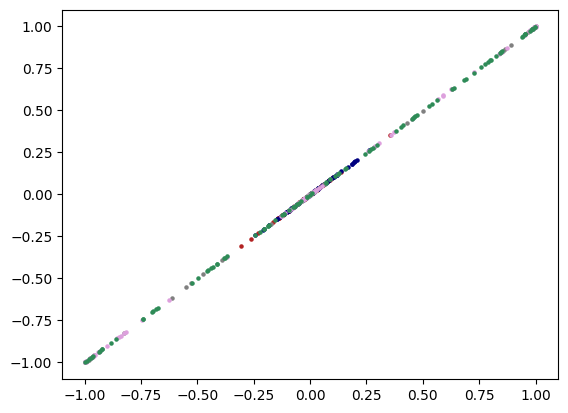

In [6]:
feature_1 = "item_id" # not taken into account during classification just to show that the visualization works
feature_2 = "sphericality"
feature_3 = "number_of_points"
feature_4 = "linearity"
feature_5 = "average_distance_to_centroid"
feature_6 = "bounding_box_size"
feature_7 = "root_mean_square_error"
feature_8 = "spread_over_x"
feature_9 = "spread_over_y"
feature_10 = "spread_over_z"
feature_11 = "verticality"
feature_12 = "point_normals_x"
feature_13 = "point_normals_y"
feature_14 = "point_normals_z"
feature_15 = "planarity"
feature_16 = "covariance_over_xyz"

for i in range(number_of_files):
    #change feature 1 and 2 to show different distribution with respect to features
    x = point_cloud_features[i][feature_13]
    y = point_cloud_features[i][feature_13]
    color = color_definer(i)      
    plt.scatter(x,y,c=color,s=5)

plt.show()

### Random forest classifier and corresponding Overal accuracy & Mean per-class accuracy

In [7]:
outcome_RF_loop_2 = []
outcome_RF_loop_3 = []
data_df = pd.DataFrame(point_cloud_features)

test_sizes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

test_features = ["sphericality","number_of_points","linearity","average_distance_to_centroid",
                 "bounding_box_size","root_mean_square_error","spread_over_x","spread_over_y",
                 "spread_over_z","verticality","point_normals_x","point_normals_y","point_normals_z",
                 "planarity","covariance_over_xyz"]

RF_loop_2(test_features,test_sizes,data_df,outcome_RF_loop_2)
RF_loop_3(test_features,test_sizes,data_df,outcome_RF_loop_3)

### Code to give best and worst classification per hyperparameter "test_size" also outputs confusion matrix

In [8]:
print('-----------------------------------------------------------------------------------------------------')
best_in_class_2(outcome_RF_loop_2,0.6) # gives best combination of 2 features for each test size used in learning curve
print('-----------------------------------------------------------------------------------------------------')
best_in_class_3(outcome_RF_loop_3,0.6) # gives best combination of 2 features for each test size used in learning curve
print('-----------------------------------------------------------------------------------------------------')
worst_in_class_2(outcome_RF_loop_2,0.9) # gives worst combination of 2 features for each test size used in learning curve
print('-----------------------------------------------------------------------------------------------------')
worst_in_class_3(outcome_RF_loop_3,0.9) # gives worst combination of 3 features for each test size used in learning curve
print('-----------------------------------------------------------------------------------------------------')


-----------------------------------------------------------------------------------------------------
0.87
spread_over_z
root_mean_square_error
0.6
|----------|----------|-----|-------|------|------|-------|
|          | building | car | fence | pole | tree | total |
|----------|----------|-----|-------|------|------|-------|
| building |    052   | 000 |  004  | 000  | 007  |  063  |
|----------|----------|-----|-------|------|------|-------|
| car      |    000   | 060 |  006  | 000  | 000  |  066  |
|----------|----------|-----|-------|------|------|-------|
| fence    |    006   | 002 |  044  | 000  | 000  |  052  |
|----------|----------|-----|-------|------|------|-------|
| pole     |    000   | 000 |  000  | 060  | 007  |  067  |
|----------|----------|-----|-------|------|------|-------|
| tree     |    003   | 000 |  000  | 004  | 045  |  052  |
|----------|----------|-----|-------|------|------|-------|
| total    |    061   | 062 |  054  | 064  | 059  |  300  |
|----------|

### Code to create 3D voxel map for each type of accuracy for a 50/50 split

In [9]:
mosaic_maker_3d(outcome_RF_loop_3,0.5,'overal_accuracy')
mosaic_maker_3d(outcome_RF_loop_3,0.5,'accuracy_building')
mosaic_maker_3d(outcome_RF_loop_3,0.5,'accuracy_car')
mosaic_maker_3d(outcome_RF_loop_3,0.5,'accuracy_fence')
mosaic_maker_3d(outcome_RF_loop_3,0.5,'accuracy_pole')
mosaic_maker_3d(outcome_RF_loop_3,0.5,'accuracy_tree')

C:\Users\Walter\AppData\Local\Temp\ipykernel_16808\3724779761.py:1156: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mappable, shrink=0.5,pad=-1)


### Code to create 2D raster map for each type of accuracy

In [12]:
mosaic_maker(test_sizes,outcome_RF_loop_2,'overal_accuracy','overal_accuracy',0.9)
mosaic_maker(test_sizes,outcome_RF_loop_2,'building','accuracy_building',0.9)
mosaic_maker(test_sizes,outcome_RF_loop_2,'car','accuracy_car',0.9)
mosaic_maker(test_sizes,outcome_RF_loop_2,'fence','accuracy_fence',0.9)
mosaic_maker(test_sizes,outcome_RF_loop_2,'pole','accuracy_pole',0.9)
mosaic_maker(test_sizes,outcome_RF_loop_2,'tree','accuracy_tree',0.9)

### Calculate individual classifications

overal_accuracy: 0.8033333333333333
accuracy_building: 0.8688524590163934
accuracy_car: 0.9516129032258065
accuracy_fence: 0.7592592592592593
accuracy_pole: 0.78125
accuracy_tree: 0.6440677966101694


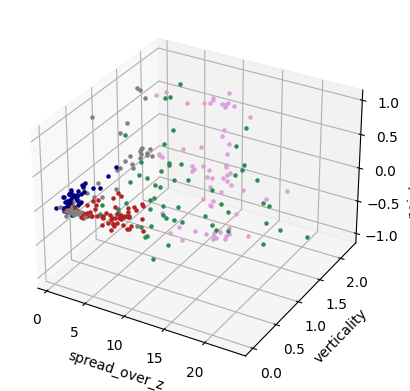

|----------|----------|-----|-------|------|------|-------|
|          | building | car | fence | pole | tree | total |
|----------|----------|-----|-------|------|------|-------|
| building |    053   | 001 |  003  | 000  | 011  |  068  |
|----------|----------|-----|-------|------|------|-------|
| car      |    001   | 059 |  008  | 000  | 000  |  068  |
|----------|----------|-----|-------|------|------|-------|
| fence    |    006   | 002 |  041  | 000  | 003  |  052  |
|----------|----------|-----|-------|------|------|-------|
| pole     |    000   | 000 |  002  | 050  | 007  |  059  |
|----------|----------|-----|-------|------|------|-------|
| tree     |    001   | 000 |  000  | 014  | 038  |  053  |
|----------|----------|-----|-------|------|------|-------|
| total    |    061   | 062 |  054  | 064  | 059  |  300  |
|----------|----------|-----|-------|------|------|-------|
{'test_size': 0.6, 'first_feature': 'spread_over_z', 'second_feature': 'verticality', 'third_feature

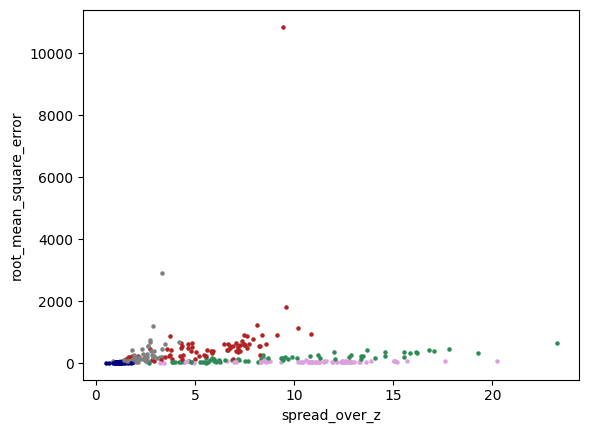

|----------|----------|-----|-------|------|------|-------|
|          | building | car | fence | pole | tree | total |
|----------|----------|-----|-------|------|------|-------|
| building |    059   | 000 |  005  | 000  | 003  |  067  |
|----------|----------|-----|-------|------|------|-------|
| car      |    000   | 068 |  011  | 000  | 000  |  079  |
|----------|----------|-----|-------|------|------|-------|
| fence    |    010   | 007 |  049  | 000  | 001  |  067  |
|----------|----------|-----|-------|------|------|-------|
| pole     |    000   | 000 |  000  | 066  | 006  |  072  |
|----------|----------|-----|-------|------|------|-------|
| tree     |    001   | 000 |  000  | 007  | 057  |  065  |
|----------|----------|-----|-------|------|------|-------|
| total    |    070   | 075 |  065  | 073  | 067  |  350  |
|----------|----------|-----|-------|------|------|-------|
{'test_size': 0.7, 'first_feature': 'spread_over_z', 'second_feature': 'root_mean_square_error', 'nu

In [11]:
individual_RF_3(data_df,"spread_over_z","verticality","point_normals_x",0.6)
individual_RF(data_df,"spread_over_z","root_mean_square_error",0.7)